# 2-2

In [5]:
# 離散化によるデータセットの可視化
import pandas as pd
import json

# 店舗についてのデータを読み込む
with open('data/yelp_academic_dataset_business.json') as biz_file:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])

biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Occurrence')

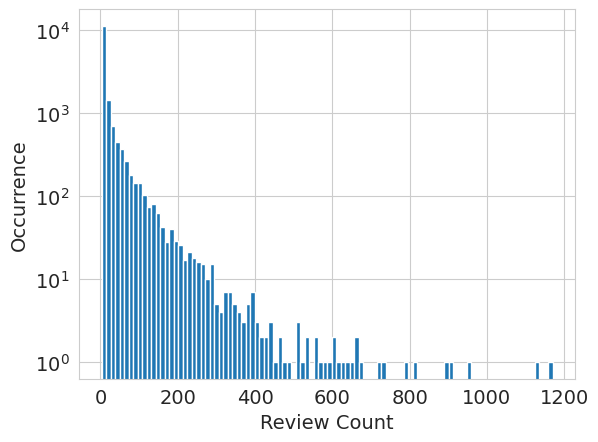

In [9]:
# レビュー件数とヒストグラムを描画
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## 固定幅によるカウントデータの離散化

In [10]:
# Yelpデータセットにおけるレビュー件数の十分位数を計算
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

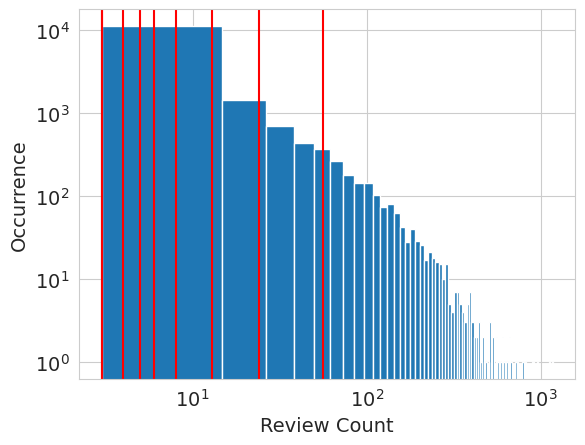

In [11]:
# ヒストグラムに十分位数を上書きする
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)